<a href="https://colab.research.google.com/github/krisrjohnson/TFCoursework/blob/master/Exercise2_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 2
In the course you learned how to do classificaiton using Fashion MNIST, a data set containing items of clothing. There's another, similar dataset called MNIST which has items of handwriting -- the digits 0 through 9.

Write an MNIST classifier that trains to 99% accuracy or above, and does it without a fixed number of epochs -- i.e. you should stop training once you reach that level of accuracy.

Some notes:
1. It should succeed in less than 10 epochs, so it is okay to change epochs to 10, but nothing larger
2. When it reaches 99% or greater it should print out the string "Reached 99% accuracy so cancelling training!"
3. If you add any additional variables, make sure you use the same names as the ones used in the class

I've started the code for you below -- how would you finish it? 

In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()  #data is already structured, just need to load in 
x_train, x_test = x_train/255.0, x_test/255.0  #normalize input values to 0-1

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')<0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),  #flatten 28x28 img into 784x1 array
    tf.keras.layers.Dense(512, activation=tf.nn.relu),  #512 worked most efficiently on fashion data, trying
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)  #softmax is basically a max fn
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

model.evaluate(x_test, y_test)

11493376/11490434 [==============================] - 0s 0us/step
Instructions for updating:
Colocations handled automatically by placer.
Epoch 1/10
59872/60000 [============================>.] - ETA: 0s - loss: 0.2017 - acc: 0.9409
Reached 99% accuracy so cancelling training!
10000/10000 [==============================] - 1s 52us/sample - loss: 0.0917 - acc: 0.9727


[0.09165215075798333, 0.9727]

In [0]:
# explore predictions on a few images
import numpy as np
first_img = 1
last_img = 10

In [54]:

classifications = model.predict(x_test)

#print(classifications[first_img:last_img])

explore_predictions = []
for i in range(first_img,last_img+1): 
  print("img tested: ", i, "\t predicted value", np.argmax(classifications[i])) 
  explore_predictions.append((i, np.argmax(classifications[i])))

explore_predictions = dict(explore_predictions)

img tested:  1 	 predicted value 2
img tested:  2 	 predicted value 1
img tested:  3 	 predicted value 0
img tested:  4 	 predicted value 4
img tested:  5 	 predicted value 1
img tested:  6 	 predicted value 4
img tested:  7 	 predicted value 9
img tested:  8 	 predicted value 6
img tested:  9 	 predicted value 9
img tested:  10 	 predicted value 0


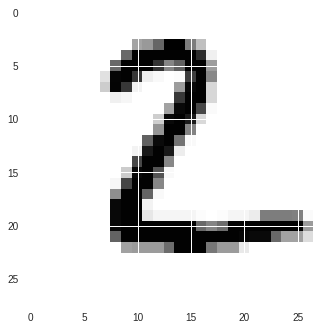

In [47]:
import matplotlib.pyplot as plt
plt.imshow(x_test[first_img])

3 4


KeyError: ignored

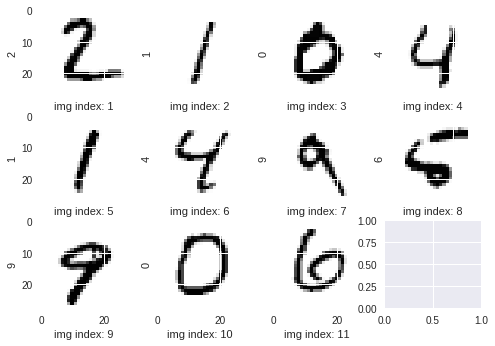

In [65]:
import matplotlib.pyplot as plt
#for i in range(first_img, last_img+1):
#  plt.imshow(x_test[i])

Nr = int((last_img - first_img + 1) **.5)
Nc = int((last_img - first_img) / Nr) + 1
print (Nr, Nc)

fig, axis = plt.subplots(Nr,Nc)

for i in range(Nr):
    for j in range(Nc):
        axis[i, j].imshow(x_test[first_img + Nc*i+j])
        axis[i, j].label_outer()
        label = "img index: " + str(first_img + Nc*i + j)
        axis[i, j].set_xlabel(label)
        axis[i, j].set_ylabel(explore_predictions[first_img + Nc*i + j]) #TODO: add condition to only set a ylabel if the item exists in the dict
        
plt.show()

Img index 8 looks to me like a 5 but is classified as a 6, let's look at the model's predictions

In [71]:
for i in range(len(classifications[8])):
  print("possible number: ", i, "\t predicted value: ", classifications[8][i])

possible number:  0 	 predicted value:  0.0014852438
possible number:  1 	 predicted value:  0.0002561382
possible number:  2 	 predicted value:  0.07313955
possible number:  3 	 predicted value:  0.00076872326
possible number:  4 	 predicted value:  0.038789213
possible number:  5 	 predicted value:  0.35022208
possible number:  6 	 predicted value:  0.37608936
possible number:  7 	 predicted value:  4.121129e-05
possible number:  8 	 predicted value:  0.12140925
possible number:  9 	 predicted value:  0.03779913
